### **INTRODUCTION**


The objective of the study is to analyse the data on borrowers from 'LendingClub.com' website and to conduct various algorithm in order to get meaningful information from it.The 'Decision Tree for regression' statiscal algorithm would be used to train the dataset and predict a whether using credit score and other indicators to indicate whether a lender will pay off debt,a good decision
Lending Club is the world's largest online marketplace connecting borrowers and investors.From the data analysus,tghere will be a discovery of valuable insight that will be of importance to investors.

**RESEARCH QUESTIONS**

The aim of this study is to answer the questions

a)Does credit score depict one's ability to pay back loans?

b)Does interest rate help in avoiding bad debt?

c)Does installment payment help in paying back loans?

**DATA COLLECTION AND METHODOLOGY**

The data used in this analysis is a secondary data from Kaggle.It uses the lending data from 2007-2010.

**Features**

The cleaned dataset has the following features

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# **STARTING ANALYSIS WITH PYTHON**

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# reading the data into a dataframe
df = pd.read_csv('/loan_data.csv')
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:

# Get some info about the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Cleaning data,visualising and exploring data**

Data cleaning was done before importing the data into python as data was in an xls format and all information in one column seperated by commas.
Therefore, each data was seperated into a column and saved as csv file before importing.

In [ ]:
#summary statistics
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


*Form the summary statistics*

we see that 75% of the 9578  observation met 
the credit underrating of the organization.The mean was 0.8 and only 0.4 
deviated from the mean.An average of 319 had installment payment.

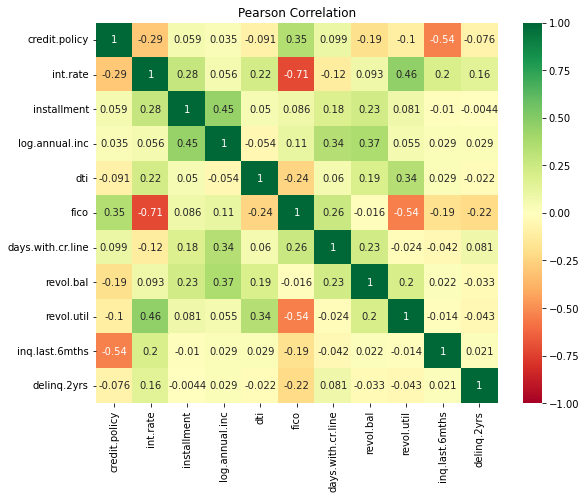

In [ ]:
#checking correlation in data

features_num = ['credit.policy','int.rate', 'installment', 'log.annual.inc',
                'dti', 'fico', 'days.with.cr.line',
                'revol.bal', 'revol.util',
                'inq.last.6mths', 'delinq.2yrs']
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (9,7))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

**From the correlation coeffecient we notice that **

1.The credit policy and the borrrower's number of inquries by creditors in the last 6 months (inq.last.6months) is highly negatively correlated.Showing that they move in the opposite direction.

2.As a borrower's FICO's score goes down,interest rate goes up.That is also a negative high correlation.

3.As the amount of credit line relative to total credit available increases FICO's score decreases.


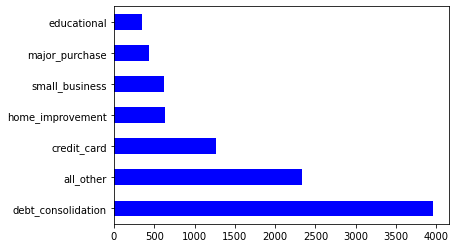

In [ ]:
#visualization
df['purpose'].value_counts().plot(kind='barh',color='blue')

We notice that most borrowings were for the purpose of debt consolidation and education was the least purpose for loan collection.

**bold text**# **MODEL EVALUATIONS OF THE DATA**

# MODEL 1 : DECISION TREE ALGORITHM

This algorithm is good for identifying risky loan application  to achieve a lower loan default rate.


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
#Feature Selection
##split dataset in features and target variable
X = df[features_num] # Features
y = df['not.fully.paid'] # Target variable


In [ ]:
#Splitting Data
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
# Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating Model
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7306889352818372


The accuracy rate is 73.05%.That indicates the level of accurate predictions.

In [ ]:
#Visualizing Decision Trees
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features_num,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
confusion_matrix(y_test,predictions)



array([[2013,  384],
       [ 377,  100]])

# **MODEL 2: Decision Tree for Regression**

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Preparing the Data
X = df[features_num] # Features
y = df['not.fully.paid'] # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Training and Making Predictions

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
#To make predictions on the test set, ues the predict method:
y_pred = regressor.predict(X_test)


In [ ]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
3343,0,0.0
9,0,0.0
1741,0,0.0
5160,0,0.0
7760,0,1.0
...,...,...
2113,0,1.0
9282,0,0.0
2434,0,0.0
7287,1,0.0


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.26356993736951984
Mean Squared Error: 0.26356993736951984
Root Mean Squared Error: 0.5133906284395147


The mean absolute error for our algorithm is close , which is less than 10 percent of the mean of all the values in the 'not.fully.paid'column. This means that our algorithm did a fine prediction job.